https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

# One-way ANOVA test

In [42]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os


import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Start of ANOVA Testing

## ANOVA assumptions:
- Randomly selected from the population
- Normality
- Homogeneity of variance (approximately equal)
- Samples are independent of each other

In [43]:
dataNew = pd.read_csv('../DATA/covid_case_density_group.csv')

In [44]:
dataNew

,Dense1,Dense2,Dense3,Dense4
0,41.0,1.0,47.0,2721.0
1,38.0,2.0,2.0,1.0
2,37.0,40.0,31.0,43.0
3,2035.0,1.0,41.0,41.0
4,364.0,301.0,80.0,2.0
5,12.0,1.0,1.0,2.0
6,12.0,1230.0,2789.0,2.0
7,1.0,412.0,112.0,3.0
8,21.0,13.0,2263.0,455.0
9,41.0,3.0,679.0,2561.0


In [349]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,260.200000,200.400000,604.500000,583.100000
std,632.770417,390.644539,1039.782483,1094.079161
min,1.000000,1.000000,1.000000,1.000000
25%,14.250000,1.250000,33.500000,2.000000
50%,37.500000,8.000000,63.500000,22.000000
75%,41.000000,235.750000,537.250000,352.000000
max,2035.000000,1230.000000,2789.000000,2721.000000


In [350]:
#Plot number of Corona cases across different density groups to check their distribution.
def plot_distribution(dataNew):
    fig = plt.figure(figsize=(10,10))
    title = fig.suptitle("Corona cases across different density groups", fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(2,2,1)
    ax1.set_title("density Group-Dense1 & Corona Cases")
    ax1.set_xlabel("density Group -Dense1")
    ax1.set_ylabel("Corona Cases") 
    sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True, bw_adjust=1, color='g')

    ax2 = fig.add_subplot(2,2,2)
    ax2.set_title("density Group -Dense2 & Corona Cases")
    ax2.set_xlabel("density Group -Dense2")
    ax2.set_ylabel("Corona Cases") 
    sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True, bw_adjust=1, color='y')

    ax2 = fig.add_subplot(2,2,3)
    ax2.set_title("density Group -Dense2 & Corona Cases")
    ax2.set_xlabel("density Group -Dense3")
    ax2.set_ylabel("Corona Cases") 
    sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True, bw_adjust=1, color='r')

    ax2 = fig.add_subplot(2,2,4)
    ax2.set_title("density Group -Dense4 & Corona Cases")
    ax2.set_xlabel("density Group -Dense4")
    ax2.set_ylabel("Corona Cases") 
    sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True, bw_adjust=1, color='b')
    plt.show()

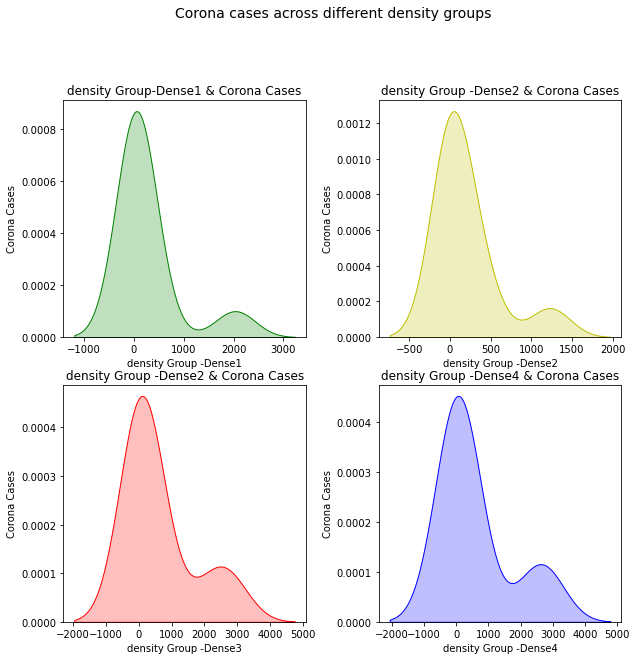

In [351]:
plot_distribution(dataNew)

In [45]:
# Box Cox transformation to Normality
dataNew['Dense1'],fitted_lambda = stats.boxcox(dataNew['Dense1'])
dataNew['Dense2'],fitted_lambda = stats.boxcox(dataNew['Dense2'])
dataNew['Dense3'],fitted_lambda = stats.boxcox(dataNew['Dense3'])
dataNew['Dense4'],fitted_lambda = stats.boxcox(dataNew['Dense4'])

In [46]:
dataNew.describe().T

,count,mean,std,min,25%,50%,75%,max
Dense1,10.0,3.197675,1.648665,0.0,2.441793,3.284128,3.357049,6.216892
Dense2,10.0,1.875117,1.763699,0.0,0.164506,1.568902,3.572922,4.356097
Dense3,10.0,4.774427,3.068434,0.0,3.732793,4.435388,6.791456,9.171120
Dense4,10.0,2.202865,1.810644,0.0,0.658643,1.933808,3.734736,4.651681


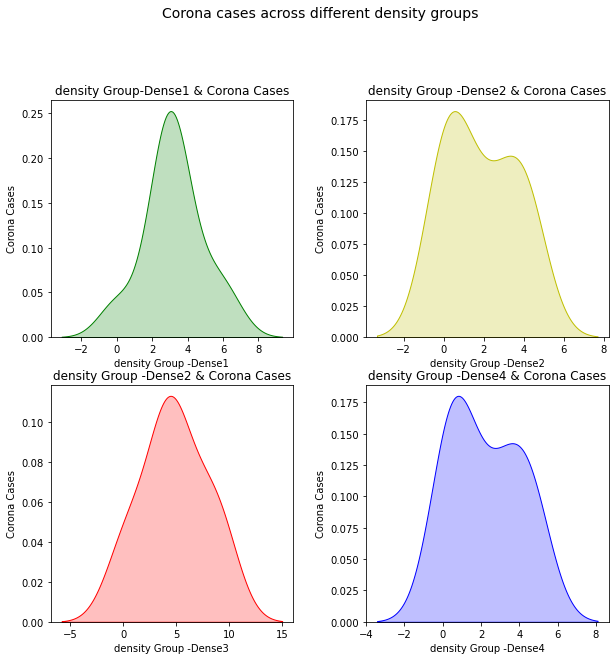

In [354]:
plot_distribution(dataNew)

In [49]:
# Normality Check
def normality(data, groups):
    for group in groups:
        statistic, pvalue = stats.shapiro(data[group])
        print(f'{group} p-value: {pvalue:.2f}')

In [48]:
groups = ['Dense1', 'Dense2', 'Dense3', 'Dense4']
print('H0: Data was drawn from a normal distribution')
print('-'*50)
normality(dataNew, groups)

H0: Data was drawn from a normal distribution
--------------------------------------------------
Dense1 p-value: 0.37
Dense2 p-value: 0.09
Dense3 p-value: 0.53
Dense4 p-value: 0.08


In [50]:
# Homogeneity Check
statistic, pvalue = stats.levene(dataNew['Dense1'], dataNew['Dense2'], dataNew['Dense3'], dataNew['Dense4'])
print('H0: samples are from populations with equal variances')
print('-'*50)
print('p-value', round(pvalue,2))

H0: samples are from populations with equal variances
--------------------------------------------------
p-value 0.2


## Approach 1: Using stats.f_oneway()

In [51]:
f_score, pvalue = stats.f_oneway(dataNew['Dense1'], dataNew['Dense2'], dataNew['Dense3'], dataNew['Dense4'])
print('H0: All groups have the same population mean (There is no significant difference as per density of an area and number of covid cases. )')
print('-'*50)
print(f'F-Statistic: {f_score:.2f} with p-value: {pvalue:.2f}')

H0: All groups have the same population mean (There is no significant difference as per density of an area and number of covid cases. )
--------------------------------------------------
F-Statistic: 3.66 with p-value: 0.02


## Approach 2: Using OLS

In [27]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,41.0,1.0,47.0,2721.0
1,38.0,2.0,2.0,1.0
2,37.0,40.0,31.0,43.0
3,2035.0,1.0,41.0,41.0
4,364.0,301.0,80.0,2.0


In [52]:
# Transform dataframe to have target variable for OLS formula
newDf = dataNew.stack().to_frame().reset_index().rename(columns={'level_1': 'density_Group', 0: 'Count'})

del newDf['level_0']

In [53]:
newDf.head()

,density_Group,Count
0,Dense1,3.357049
1,Dense2,0.000000
2,Dense3,4.127342
3,Dense4,4.651681
4,Dense1,3.295040


In [54]:
model = ols('Count ~ C(density_Group)', newDf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.662
Date:                Sat, 31 Jul 2021   Prob (F-statistic):             0.0211
Time:                        12:48:32   Log-Likelihood:                -85.304
No. Observations:                  40   AIC:                             178.6
Df Residuals:                      36   BIC:                             185.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.1977      0.680      4.699      0.000       1.818       4.578
C(density_Group)[T.Dense2]    -1.3226      0.962     -1.374      0.178      -3.274       0.629
C(density_Group)[T.Dense3]     1.5768      0.962      1.638      0.110      -0.375       3.528
C(density_Group)[T.Dense4]    -0.9948      0.962     -1.034      0.308      -2.947       0.957
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.087
Skew:                           0.045   Prob(JB):                        0.958
Kurtosis:                       2.790   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 36) =  3.662, p =  0.0211


In [56]:
# Creates the ANOVA table
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(density_Group),50.878267,3.0,3.662457,0.021125
Residual,166.702073,36.0,NaN,NaN


> Based on p-value of 0.02 we can reject the `H0: There is no significant difference as per density of an area and number of covid's cases`. An indication that there is an overall significant effect of density group on positive covid cases.

> However, we don't know where the difference between density group YET. 

## Post-hoc Tests

In [57]:
newDf.dtypes

density_Group     object
Count            float64
dtype: object

In [58]:
newDf.head()

,density_Group,Count
0,Dense1,3.357049
1,Dense2,0.000000
2,Dense3,4.127342
3,Dense4,4.651681
4,Dense1,3.295040


In [59]:
mc = statsmodels.stats.multicomp.MultiComparison(newDf['Count'], newDf['density_Group'])
# Tukey's range test to compare means of all pairs groups
mc_results = mc.tukeyhsd()
mc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Dense1,Dense2,-1.3226,0.521,-3.9144,1.2693,False
Dense1,Dense3,1.5768,0.3714,-1.0151,4.1686,False
Dense1,Dense4,-0.9948,0.7091,-3.5867,1.5971,False
Dense2,Dense3,2.8993,0.0233,0.3074,5.4912,True
Dense2,Dense4,0.3277,0.9,-2.2641,2.9196,False
Dense3,Dense4,-2.5716,0.0525,-5.1634,0.0203,False


In [36]:
mc_results.pvalues

array([0.9       , 0.77457103, 0.8059751 , 0.68680671, 0.71821298,
       0.9       ])

In [37]:
dataNew.describe().T

,count,mean,std,min,25%,50%,75%,max
Dense1,10.0,260.2,632.770417,1.0,14.25,37.5,41.00,2035.0
Dense2,10.0,200.4,390.644539,1.0,1.25,8.0,235.75,1230.0
Dense3,10.0,604.5,1039.782483,1.0,33.50,63.5,537.25,2789.0
Dense4,10.0,583.1,1094.079161,1.0,2.00,22.0,352.00,2721.0


In [38]:
# Homogeneity of variances Check
w, pvalue = stats.levene(newDf['Count'][newDf['density_Group']=='Dense1'], newDf['Count'][newDf['density_Group']=='Dense2']
                           , newDf['Count'][newDf['density_Group']=='Dense3'], newDf['Count'][newDf['density_Group']=='Dense4'])
print(w, pvalue)

0.6326433069207031 0.5987778380615685


In [39]:
# Normality Check on residuals
stats.shapiro(model.resid)

ShapiroResult(statistic=0.6768302917480469, pvalue=4.140572329447423e-08)

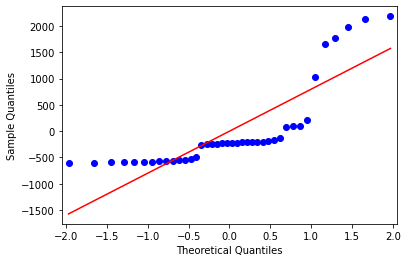

In [40]:
# Q-Q Plot Check for Normal Distribution of residuals
res = model.resid
sm.qqplot(res, line='s')
plt.show()

> We have satisfied all ANOVA assumptions. Therefore, the results from the test is valid. 